<a href="https://colab.research.google.com/github/SRDxRestricted/Diabities_ML/blob/main/Diabities_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("diabetes.csv")
df.head()

Saving diabetes.csv to diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [5]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)
# here we are using the concept of standardising the data values such that the mean of each column becomes 0 and the standard deviation
# becomes 1. this will help some of the models to perform better due to gradient optimization.

In [6]:
model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
y_prob = model.predict_proba(X_test_s)[:, 1]
results = pd.DataFrame({
    "Actual": np.array(y_test).astype(int),
    "Predicted": np.array(y_pred).astype(int),
    "Probability": y_prob
}).reset_index(drop=True)
results


,Actual,Predicted,Probability
0,1,1,0.601083
1,0,0,0.496643
2,0,0,0.177830
3,1,1,0.586194
4,1,1,0.867960
...,...,...,...
187,0,0,0.045087
188,0,0,0.273808
189,0,0,0.323305
190,1,1,0.517218


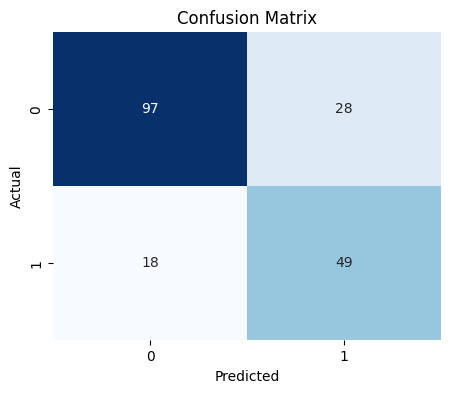

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(results["Actual"], results["Predicted"])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test,y_pred)
print(f"✅ Model Accuracy: {accuracy:.3f}")
print("\n")
print(classification_report(y_test, y_pred))

# My model here is actually not doing so good in predicting the cases of
# diabities so the next time i will have to use another algorithm

✅ Model Accuracy: 0.760


              precision    recall  f1-score   support

           0       0.84      0.78      0.81       125
           1       0.64      0.73      0.68        67

    accuracy                           0.76       192
   macro avg       0.74      0.75      0.74       192
weighted avg       0.77      0.76      0.76       192

